In [23]:
from __future__ import division  #Since the current division operator results in error-prone for floats or complex,
                                 #this import returns a reasonable result.
import numpy as np  #This is the core library for scientific computing. Provides a high-performance multidimensional
                    #array object, and tools for working with these arrays.
from numpy.random import rand  #This is for random values in a given shape. Create an array of the given shape and
                               #populate it with random samples from a uniform distribution over [0, 1). For
                               #np.random.randint, it returns random integers from low (inclusive) to high
                               #(exclusive). Returns random integers from the “discrete uniform” distribution of the 
                               #specified dtype in the “half-open” interval [low, high). If high is None
                               #(the default), then results are from [0, low).
import matplotlib.pyplot as plt  #Provides a MATLAB-like plotting framework.

def mhmove(configuration, beta):  #Implementing the Metroplis-Hastings algorithm for the Ising model on a square
                                  #lattice. Variables 'configuration' is for the entire configuration of spins, and
                                  #'beta' is for the constant of the distribution based on the Boltzmann distribution.
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)  #Random integers from low to high based on the total amount of sites.
                                             #These two variables of 'a' and 'b' would help to contribute on making
                                             #the probability of states of '+1' and '-1'.
                b = np.random.randint(0, N) 
                s_i =  config[a,b]  #Change of sign.
                top = config[(a-1)%N,b]  #Top neighbor.
                bottom = config[(a+1)%N,b]  #Bottom neighbor.
                left = config[a,(b-1)%N]  #Left neighbor.
                right = config[a,(b+1)%N]  #Right neighbor.
                spin_neighbors = top + bottom + left + right #Four nearest neighbors.
                delta_E = 2*s_i*spin_neighbors  #Picking a random site i on the 2D lattice and computes the energy
                                                #change due to the change of sign in s_i.
                if delta_E < 0:
                    s_i *= -1  #If delta_E is less than zero, than accept the move of spin-down. This means that it 
                               #multiplies right operand with the left operand and assign the result to left operand
                elif rand() < np.exp(-delta_E*beta):  #Beta is '1' for this algorithm.
                    s_i *= -1  #If the random configurations has a value less than the Boltzmann distribution,
                               #spin-down. Otherwise, spin-up.
                config[a,b] = s_i
    return config  #Forms a lattice of '+1' and '-1' based on the Metropolis-Hastings algorithm.

def mean_E(config):  #Calculating the mean of the energy as well as the configuration of it based on the Metropolis-
                     #Hastings algorithm (or mhmove) that was made above. This will be used for calculating the mean
                     #internal energy later.
    energy = 0  #The initial configuration of the energy.
    for i in range(len(config)):
        for j in range(len(config)):
            S_i = config[i,j]  #I'm doing the same thing here as above in order to not have a possibility of a
                               #computational error.
            top = config[(i-1)%N,j]
            bottom = config[(i+1)%N,j]
            left = config[i,(j-1)%N]
            right = config[i,(j+1)%N]
            spin_neighbors = top + bottom + left + right
            energy += -spin_neighbors*S_i  #The result of the mean energy where an energy of '0' would be the seed and
                                           #keeps on increasing based on this configuration.
    return energy/4.  #Divide by '4' since that is the the number of states there would be based on computing the
                      #sample average.

def mean_M(config):  #Calculating the mean of the magnetization as well as the configuration of it based on the
                     #Metropolis-Hastings algorithm (or mhmove) that was made before. This well be used for calculating
                     #the magnetization later.
    mag = np.sum(config)  #The result of the NET MAGNETIZATION.
    return mag

nt = 128  #The number of temperature points that will be used for the graphs.
N = 16  #A NxN square lattice.

Energy = np.zeros(nt)  #For these next four codes which includes this one, it will be used for later when calculating
                       #and generating a lattice based on all the codes that were and will be defined. It will also be
                       #used to generate plots, but for now, they are just zeroes.
Magnetization = np.zeros(nt)
SpecificHeat = np.zeros(nt)
Susceptibility = np.zeros(nt)

T = np.linspace(1, 4, nt)  #Plotting the temperature points between 1 and 4 on the x-axis. The critical temperature is
                           #at approximately 2.2692.

for m in range(len(T)):  #Generating a lattice for 'N'.
    E1 = M1 = E2 = M2 = 0  #Initial states.
    def initialstate(N):  # Initial configurations for the spin states.
        state = 2*np.random.randint(2, size=(N,N))-1
        return state
    
    eqsteps = 1000  #When the system is at equilibrium. '1000' steps is the best I could achieve for this simulation.
    config = initialstate(N)
    for i in range(eqsteps):
        mhmove(config, 1.0/T[m])

    mhsteps = 1000  #Uses the amount of sweeps for the Metropolis-Hastings algorithm, and it uses the algorithm defined
                    #above to generate the simulation before and after the equilibrium point. Again, '1000' is the best
                    #that I could achieve.
    for i in range(mhsteps):
        mhmove(config, 1.0/T[m])
        Ene = mean_E(config)  #Calculating the energy based on the number of sweeps.
        Mag = mean_M(config)  #Calculating the magnetization based on the number of sweeps.

        E1 = E1 + Ene  #Starts with a seed of '0' but keeps on increasing, or generates the sequence. This is also the
                       #definition of <E>.
        M1 = M1 + Mag  #Starts with a seed of '0' but increases from there, or generates the sequence. This is also the
                       #definition of <M>.
        M2 = M2 + Mag*Mag  #Starts with a seed of '0' but keeps on increasing. Also a definition of <S^2>.
        E2 = E2 + Ene*Ene  #Starts with a seed of '0' but keeps on increasing. Also a definition of <E^2>.

        Energy[m] = E1/(mhsteps*N*N)  #Definition of mean internal energy 'E'.
        Magnetization[m] = M1/(mhsteps*N*N)  #Definition of magnitization 'M'.
        SpecificHeat[m] = ( E2/mhsteps - E1*E1/(mhsteps*mhsteps) )/(N*T[m]*T[m])  #Definition of specific heat 'C_H'.
        Susceptibility[m] = ( M2/mhsteps - M1*M1/(mhsteps*mhsteps) )/(N*T[m])  #Definition of magnetic 
                                                                               #susceptibility X_T.

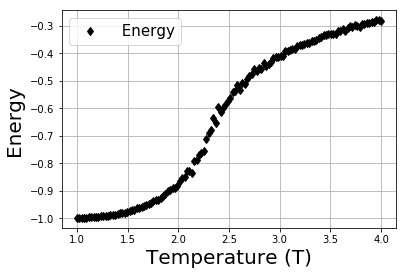

In [24]:
#The next codes are for plotting:

from pylab import *  #This is so I could put in the grid feature on the plotting.

#For the Energy vs. Temperature graph
plt.plot(T, Energy, 'd', color="black", label=' Energy');

grid(True)
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);
plt.legend(loc='best', fontsize=15);

plt.show()

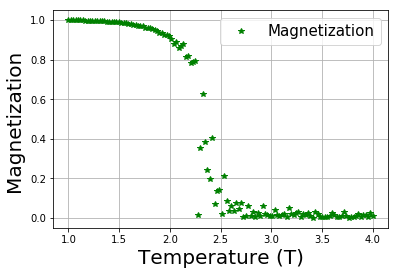

In [25]:
#For the Magnetization vs. Temperature graph  
plt.plot(T, abs(Magnetization), '*', color="green", label='Magnetization');

grid(True)
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);
plt.legend(loc='best', fontsize=15);

plt.show()

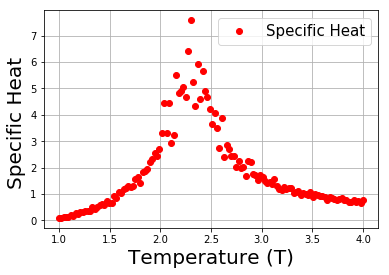

In [26]:
#For the Specific Heat vs. Temperature graph
plt.plot(T, SpecificHeat, 'o', color="red", label='Specific Heat');

grid(True)
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);
plt.legend(loc='best', fontsize=15);

plt.show()

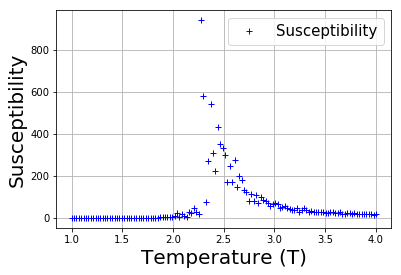

In [27]:
#For the Susceptibility vs. Temperature graph
plt.plot(T, Susceptibility, '+', color="blue", label='Susceptibility');

grid(True)
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.legend(loc='best', fontsize=15);

plt.show()

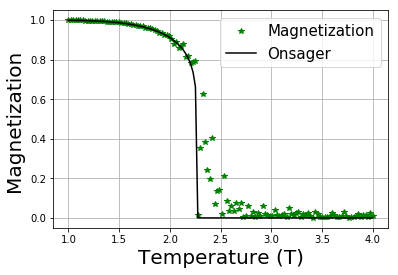

In [28]:
#For the the comparision of M with Onsager's exact solution
#For the Onsager:
def Onsager(x):
    if x < 2.2692:
        return ( 1 - ( np.sinh(2/(x)) ) ** (-4) ) ** (1/8)
    else:
        return 0
    
x_axis = np.linspace(1, 4, nt)  #Doing this to make my life easier....
y_axis = [Onsager(x) for x in x_axis]

plt.plot(T, abs(Magnetization), '*', color="green", label='Magnetization');  #Recopying the plot from earlier.

plt.plot(x_axis, y_axis, '-', color="black", label='Onsager');  #Onsager plot

grid(True)
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);
plt.legend(loc='best', fontsize=15);

plt.show()